In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
df = pd.read_csv("data/서울시_상권_추정매출.csv")

print("=" * 70)
print("데이터 불러오기 완료")
print("=" * 70)
print(f"총 레코드 수: {len(df):,}개")
print(f"컬럼 수: {len(df.columns)}개")
print(f"\n데이터 미리보기:")
print(df.head())

데이터 불러오기 완료
총 레코드 수: 20개
컬럼 수: 13개

데이터 미리보기:
    상권_코드     상권_명    행정동 업종_대분류 업종_중분류  점포수     총매출   유동인구   주거인구   직장인구  \
0  100001   강남역 상권   강남역동     소매     잡화  122  415838  23575  12964  14284   
1  100002  홍대입구 상권  홍대입구동     소매    화장품  117  225203  29495  17023   4685   
2  100003    명동 상권    명동동    서비스     세탁   93  153355   8420  18568  22769   
3  100004  건대입구 상권  건대입구동     소매    화장품   71  199503   4747   1189  22118   
4  100005    잠실 상권    잠실동     음식     양식  130  578178  10838  15502  24777   

   평균_영업기간  신규점포수  폐업점포수  
0      2.1      3      6  
1      1.4      8      3  
2      4.7      9      0  
3      5.3      7      3  
4      7.6      2      1  


In [1]:

import pandas as pd
import numpy as np

# 랜덤 시드 고정 (재현 가능)
np.random.seed(42)

# 상권, 업종 정보
districts = [
    "강남역", "홍대입구", "명동", "건대입구", "잠실", 
    "이태원", "신촌", "압구정", "사당", "노량진",
    "종로3가", "성수", "선릉", "구로디지털", "수유",
    "왕십리", "천호", "상봉", "신림", "목동"
]

categories = ["음식", "서비스", "소매"]
subcategories = {
    "음식": ["한식", "중식", "양식", "일식", "분식"],
    "서비스": ["미용", "세탁", "수리", "숙박", "학원"],
    "소매": ["편의점", "의류", "화장품", "잡화", "서점"]
}

# 데이터 생성
data = []
for i, district in enumerate(districts, start=1):
    main_cat = np.random.choice(categories)
    sub_cat = np.random.choice(subcategories[main_cat])
    stores = np.random.randint(30, 150)
    sales = np.random.randint(50000, 600000)
    floating = np.random.randint(2000, 30000)
    residential = np.random.randint(1000, 20000)
    office = np.random.randint(3000, 40000)
    years = round(np.random.uniform(1, 8), 1)
    new_stores = np.random.randint(1, 10)
    closed_stores = np.random.randint(0, 8)
    
    data.append([
        100000 + i, f"{district} 상권", f"{district}동", main_cat, sub_cat,
        stores, sales, floating, residential, office, years, new_stores, closed_stores
    ])

# 컬럼 정의
columns = [
    "상권_코드", "상권_명", "행정동", "업종_대분류", "업종_중분류",
    "점포수", "총매출", "유동인구", "주거인구", "직장인구",
    "평균_영업기간", "신규점포수", "폐업점포수"
]

# DataFrame 생성
df = pd.DataFrame(data, columns=columns)

# CSV 파일로 저장
save_path = "서울시_상권_추정매출.csv"
df.to_csv(save_path, index=False, encoding="utf-8-sig")

print(f"✅ CSV 파일 생성 완료: {save_path}")
print(df.head())


✅ CSV 파일 생성 완료: 서울시_상권_추정매출.csv
    상권_코드     상권_명    행정동 업종_대분류 업종_중분류  점포수     총매출   유동인구   주거인구   직장인구  \
0  100001   강남역 상권   강남역동     소매     잡화  122  415838  23575  12964  14284   
1  100002  홍대입구 상권  홍대입구동     소매    화장품  117  225203  29495  17023   4685   
2  100003    명동 상권    명동동    서비스     세탁   93  153355   8420  18568  22769   
3  100004  건대입구 상권  건대입구동     소매    화장품   71  199503   4747   1189  22118   
4  100005    잠실 상권    잠실동     음식     양식  130  578178  10838  15502  24777   

   평균_영업기간  신규점포수  폐업점포수  
0      2.1      3      6  
1      1.4      8      3  
2      4.7      9      0  
3      5.3      7      3  
4      7.6      2      1  


In [20]:
# 데이터 품질 확인
# 1. 결측치 확인
(df.isna().sum())[df.isna().sum() > 0]
# 2. 중복데이터 확인
df[df.duplicated()]
# 3. 데이터 타입 확인
pd.DataFrame(df.dtypes).T
# 4. 기술통계
df.describe(include=object)

,상권_명,행정동,업종_대분류,업종_중분류
count,20,20,20,20
unique,20,20,3,9
top,강남역 상권,강남역동,음식,화장품
freq,1,1,9,4


In [21]:
# 데이터 전처리
    # 결측치 확인 및 제거 또는 대처
    # 이상치 제거  IQR = Q3- Q1      [Q1 - 1.5xIQR   ~~~    Q3 + 1.5xIQR]
    # 파생변수 생성
        # 평일 총 매출,  주말 총 매출, 평일과주말비율
        # 날자가 있는경우 주말과 공휴일 여부  0 / 1
        # 비율, 점유율, 할인율 등.... 기존데이터로 새로운 피처를 생성

In [29]:
# 이상치 여부 확인  월 매출금액
# quantile(0.25)
# boxplot
seoul_df = pd.read_csv('서울시 상권분석서비스(추정매출-상권)_2024년.csv',encoding='cp949')
seoul_df.columns = seoul_df.columns.str.replace('_',"")
seoul_df.columns = seoul_df.columns.str.replace('연령대10매출금액','10대매출금액')
seoul_df.columns = seoul_df.columns.str.replace('연령대20매출금액','20대매출금액')
seoul_df.columns = seoul_df.columns.str.replace('연령대30매출금액','30대매출금액')
seoul_df.columns = seoul_df.columns.str.replace('연령대40매출금액','40대매출금액')
seoul_df.columns = seoul_df.columns.str.replace('연령대50매출금액','50대매출금액')
seoul_df.columns = seoul_df.columns.str.replace('연령대60이상매출금액','60대이상매출금액')


In [32]:
seoul_df.to_csv('서울시 상권분석서비스(추정매출-상권)_2024년.csv',encoding='utf-8')

In [33]:
# https://drive.google.com/file/d/125o7TvA2A-1xbJniSBdWTzl-3PEGv_bT/view?usp=sharing
import requests
url = "https://drive.google.com/uc?export=download&id=125o7TvA2A-1xbJniSBdWTzl-3PEGv_bT"
r = requests.get(url)
open('seoul.csv', 'wb').write(r.content)

32628175

In [34]:
pd.read_csv('seoul.csv')

,Unnamed: 0,기준년분기코드,상권구분코드,상권구분코드명,상권코드,상권코드명,서비스업종코드,서비스업종코드명,당월매출금액,당월매출건수,...,시간대건수~21매출건수,시간대건수~24매출건수,남성매출건수,여성매출건수,연령대10매출건수,연령대20매출건수,연령대30매출건수,연령대40매출건수,연령대50매출건수,연령대60이상매출건수
0,0,20241,A,골목상권,3110001,이북5도청사,CS100001,한식음식점,385150643,11743,...,3496,52,6023,4281,26,508,935,1997,3135,3704
1,1,20241,A,골목상권,3110001,이북5도청사,CS100009,호프-간이주점,11026440,214,...,123,39,103,78,0,0,0,32,55,95
2,2,20241,A,골목상권,3110001,이북5도청사,CS200001,일반교습학원,52047765,224,...,112,8,48,176,0,0,8,152,64,0
3,3,20241,A,골목상권,3110002,독립문역 1번,CS100001,한식음식점,582522265,20630,...,5358,487,11887,7589,17,914,2595,3483,5408,7049
4,4,20241,A,골목상권,3110002,독립문역 1번,CS100005,제과점,446525280,40242,...,11472,2634,16005,22755,329,3589,7446,8867,9543,8986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87174,87174,20244,U,관광특구,3001496,강남 마이스 관광특구,CS300021,문구,1542805997,117128,...,34868,2761,34022,67895,1451,31370,33008,18533,11071,6482
87175,87175,20244,U,관광특구,3001496,강남 마이스 관광특구,CS300022,화장품,2056516146,40912,...,14941,2102,12984,24990,226,7788,11601,8376,6395,3590
87176,87176,20244,U,관광특구,3001496,강남 마이스 관광특구,CS300026,완구,751319867,22836,...,9832,625,8113,14723,694,8793,8099,3632,1338,280
87177,87177,20244,U,관광특구,3001496,강남 마이스 관광특구,CS300028,화초,1147792881,28293,...,8235,12,8096,16061,627,7600,7525,4655,2499,1247


In [37]:
df = pd.read_csv('seoul.csv')
df.columns = df.columns.str.replace('당월매출금액','월매출금액')
df.columns = df.columns.str.replace('당월매출건수','월매출건수')

<Axes: ylabel='월매출금액'>

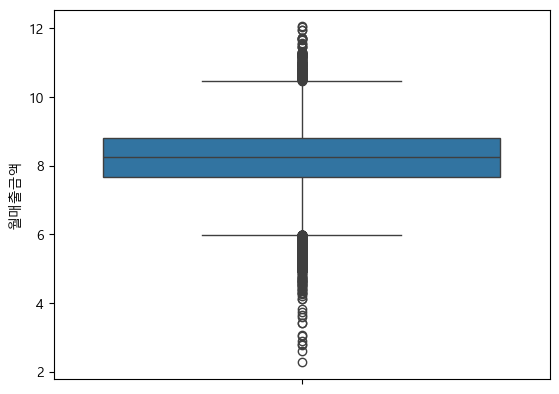

In [42]:
import seaborn as sns
np.log10(df['월매출금액'])
sns.boxplot(df, y=np.log10(df['월매출금액']))


In [43]:
# IQR
Q1 = df['월매출금액'].quantile(0.25)
Q3 = df['월매출금액'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['월매출금액'] < lower_bound) | 
                      (df['월매출금액'] > upper_bound)]

print(f"\n이상치: {len(outliers)}개 ({len(outliers)/len(df)*100:.1f}%)")
print("이상치 처리 방법 선택:")
print("  1) 제거: 분석에서 제외")
print("  2) 유지: 특별한 케이스로 별도 분석")
print("  → 프로젝트 목적에 따라 결정")


이상치: 10689개 (12.3%)
이상치 처리 방법 선택:
  1) 제거: 분석에서 제외
  2) 유지: 특별한 케이스로 별도 분석
  → 프로젝트 목적에 따라 결정


In [50]:
print(set(df['상권코드명'].unique().tolist()))

{'군자역 5번', '도봉산입구', '서울금융고등학교', '둔촌동역 4번', '광진경찰서', '한울중학교', '창동역 2번', '천왕역 3번(오류2동주민센터, 서울오류남초등학교)', '신당역', '개봉중학교', '응암오거리상점가', '정곡초등학교', '구로세무서', '석수역 1번 출입구', '수유시장옆', '광운대역 1번', '옥수역 6번', '한성대입구역 5번', '구로4동주민센터', '연산군묘', '아현역 1번', '서빙고역 1번', '퇴계로5가', '서대문소방서', '다산성곽길', '상계초등학교', '까치산역 1번', '방산종합시장(방산시장)', '영중로', '등마루시장', '을지로4가역', '포이사거리(삼호물산)', '영등포시장역 3번', '양재근린공원(양재2동주민센터)', '성수동카페거리', '장로회신학대학교', '신촌역 6번', '내방역 8번', '광흥창역 1번', '교육개발원입구사거리', '이경시장', '수락산역 4번', '성수119안전센터', '도화동 상점가', '성곡미술관', '불광중학교', '신목동역', '영등포구청역 6번', '양지어린이공원', '홍제3동주민센터', '홍대소상공인상점가', '연희세브란스병원', '본서부병원', '무너미어린이공원', '상수역 3번', '구산역 4번', '둔촌동역 1번(한산중학교)', '망리단길', '구로초등학교', '방배동카페골목', '경기고교사거리(경기고교앞사거리)', '동작구자원봉사센터', '솔숲어린이공원', '경복고등학교', '서울독일학교', '강동구청역', '선정릉역', '강동역 4번(강풀만화거리)', '가로수길', '신아타운', '당고개역 5번', '금천어울림복지센터', '경성고등학교', '홍익지구대', '관악구 중앙길', '상왕십리역 3번', '모래내시장(서중시장)', '메가박스 상봉', '개봉3동주민센터', '양천향교역 5번', '응암정보도서관', '신사역', '방배초등학교', '강남구보훈회관', '어린이대공원역 3번', '시립대앞사거리', '한강로동땡땡거리(은행나무길)', '노룬산시장(노룬산골목시

In [ ]:
%pip install geopy

In [55]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_app")
location = geolocator.geocode("상계백병원")
location.address

'상계백병원, 동일로213길, 상계6·7동, 노원구, 서울특별시, 01768, 대한민국'

In [56]:
df.columns

Index(['Unnamed: 0', '기준년분기코드', '상권구분코드', '상권구분코드명', '상권코드', '상권코드명',
       '서비스업종코드', '서비스업종코드명', '월매출금액', '월매출건수', '주중매출금액', '주말매출금액', '월요일매출금액',
       '화요일매출금액', '수요일매출금액', '목요일매출금액', '금요일매출금액', '토요일매출금액', '일요일매출금액',
       '시간대00~06매출금액', '시간대06~11매출금액', '시간대11~14매출금액', '시간대14~17매출금액',
       '시간대17~21매출금액', '시간대21~24매출금액', '남성매출금액', '여성매출금액', '10대매출금액',
       '20대매출금액', '30대매출금액', '40대매출금액', '50대매출금액', '60대이상매출금액', '주중매출건수',
       '주말매출건수', '월요일매출건수', '화요일매출건수', '수요일매출건수', '목요일매출건수', '금요일매출건수',
       '토요일매출건수', '일요일매출건수', '시간대건수~06매출건수', '시간대건수~11매출건수', '시간대건수~14매출건수',
       '시간대건수~17매출건수', '시간대건수~21매출건수', '시간대건수~24매출건수', '남성매출건수', '여성매출건수',
       '연령대10매출건수', '연령대20매출건수', '연령대30매출건수', '연령대40매출건수', '연령대50매출건수',
       '연령대60이상매출건수'],
      dtype='object')